<font color='White'><u>**Increase the Intensity**</font></u>

In [11]:
!pip install scikit-image

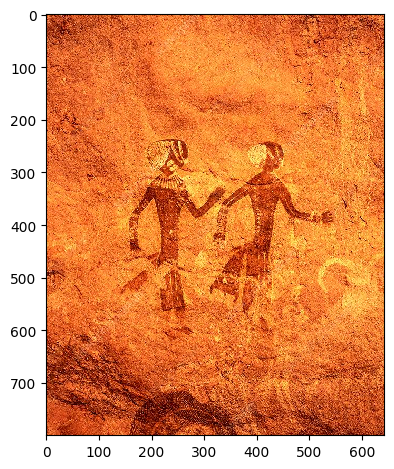

In [17]:
from PIL import Image, ImageEnhance
from skimage import io

# Load the Aboriginal art image
image = Image.open("/content/800wm.jpg")

# Apply image enhancement to increase contrast
enhancer = ImageEnhance.Contrast(image)
enhanced_image = enhancer.enhance(1.5)  # Adjust the enhancement factor as needed

# Adjust color balance and saturation
enhancer = ImageEnhance.Color(enhanced_image)
color_adjusted_image = enhancer.enhance(1.2)  # Adjust the enhancement factor as needed

# Save or display the processed image
color_adjusted_image.show()
color_adjusted_image.save("intensified_image.jpg")
img=io.imread("intensified_image.jpg")
io.imshow(img)


<font color='White'><u>**Remove the Background**</font></u>

In [6]:
!pip install Pillow

In [7]:
!pip install rembg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.1 MB/s eta 0:00:00


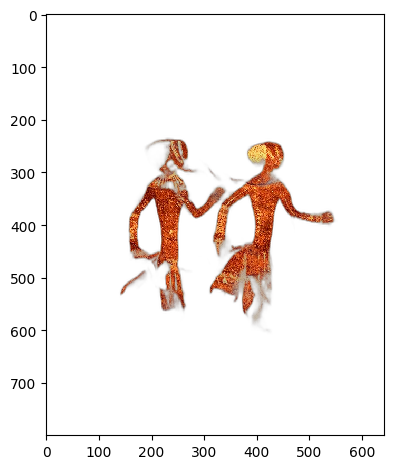

In [18]:
# Importing Required Modules
from rembg import remove
from PIL import Image

# Store path of the image in the variable input_path
input_path =  '/content/intensified_image.jpg'


# Store path of the output image in the variable output_path
output_path = '/content/removed_background_image.png'

# Processing the image
input = Image.open(input_path)

# Removing the background from the given Image
output = remove(input)

#Saving the image in the given path
output.save(output_path)

#Display the Removed Background Image
img=io.imread("removed_background_image.png")
io.imshow(img)

<font color='White'><u>**Apply Gaussian Filter**</font></u>

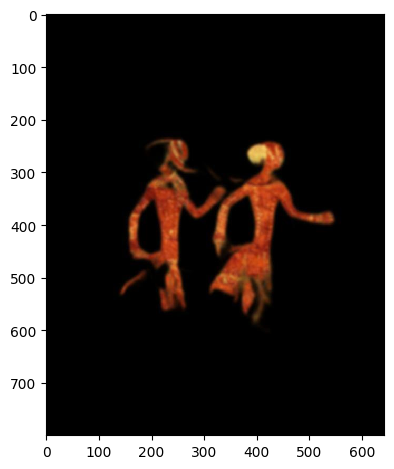

In [19]:
from PIL import Image, ImageFilter

from PIL import Image

# Open the RGBA image
rgba_image = Image.open("/content/removed_background_image.png")  # Replace with your image file path

# Convert the image to RGB mode
rgb_image = rgba_image.convert("RGB")

# Save the RGB image as JPEG
rgb_image.save("/content/output_image.jpg", "JPEG")
####

# Load the image (replace with your image file path)
image = Image.open("/content/output_image.jpg")

# Apply Gaussian blur with a specified radius
radius = 2  # Adjust the blur radius as needed
blurred_image = image.filter(ImageFilter.GaussianBlur(radius))

# Display the blurred image (optional)
blurred_image.show()

# Save the blurred image (optional)
blurred_image.save("output_blurred_image.jpg")

#Display the Removed Background Image
img=io.imread("output_blurred_image.jpg")
io.imshow(img)



<font color='red'><u>**[Optional] </font><font color='White'><B> Watershed Algorithm**</u>

<ipython-input-15-c59b3205629b>:22: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  markers = feature.peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=edges)


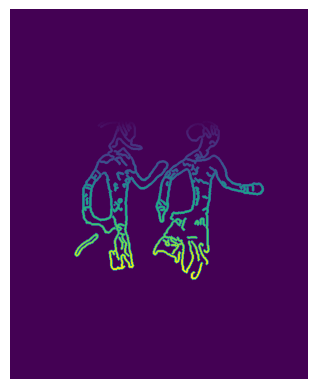

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature, morphology, segmentation
from scipy import ndimage as ndi

# Load the image
image = io.imread("/content/output_blurred_image.jpg")  # Replace with your image file path

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Apply edge detection (e.g., Canny edge detection)
edges = feature.canny(gray_image, sigma=1)

# Apply morphological operations to clean up the edges (optional)
edges = morphology.dilation(edges, morphology.disk(2))

# Compute the distance transform
distance = ndi.distance_transform_edt(edges)

# Apply watershed segmentation
markers = feature.peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=edges)
labels = morphology.label(markers)
segmented_image = segmentation.watershed(-distance, labels, mask=edges)

# Display the segmented image
plt.imshow(segmented_image, cmap="viridis")
plt.axis("off")
plt.show()

